# Home assignment #1. Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [280]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16



########################################


def filter(x, E):
    k = list()
    x_plot = list()
    for n in range(len(measurements)):
        # prediction
        x = (F * x) + u # x^k|k-1 = Fk * x^k-1|k-1 + Bkuk
        E = F * E * F.transpose() # Pk|k-1 = Fk * Pk-1|k-1 * FkT + Qk???

        # measurement update
        Z = np.matrix([measurements[n]]).transpose() - (H * x) # y~k - Hk * x^k|k-1

        S = H * E * H.transpose() + R # Sk = Hk * Pk|k-1 * HkT + Rk
        K = E * H.transpose() * np.linalg.inv(S) # Kk = Pk|k-1 * HkT * Sk-1
        k.append(K)
        x = x + K * Z # x^k|k = x^k|k-1 + Kk * y~k
        E = (I - (K * H)) * E # Pk|k = (I - Kk * Hk) * Pk|k-1
        x_plot.append(x)
        print("x= ")
        print(x)
        print("E= ")
        print(E)
    return k, x_plot


########################################

In [281]:
dt = 0.1

E = np.matrix('''
                      0. 0. 0. 0.;
                      0. 0. 0. 0.;
                      0. 0. 1000. 0.;
                      0. 0. 0. 1000.
                      ''')# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
F = np.matrix('''
                      1. 0. .1 0.; 
                      0. 1. 0. .1;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      ''')# next state function: 4D       # x = x0 + Vx * dt      # V = V0 .....
H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.''')# measurement function: reflect the fact that we observe x and y but not the two velocities
R = np.matrix('''
                      .1 0.;
                      0. .1''')# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
I = np.matrix(np.ones((1,4)))

In [282]:
print("### First Experiment ###")
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])

### First Experiment ###


In [283]:
k, x_plot = filter(x, E)

x= 
[[  4.99009901]
 [ 10.02079208]
 [  9.9009901 ]
 [-20.79207921]]
E= 
[[ 100.0990099   110.         1000.99009901 1100.        ]
 [ 110.          100.0990099  1100.         1000.99009901]
 [  10.99009901  110.          109.9009901  1100.        ]
 [ 110.           10.99009901 1100.          109.9009901 ]]
x= 
[[  6.00008015]
 [  7.99992475]
 [ 10.0489149 ]
 [-20.95186206]]
E= 
[[ 484.08031334  444.37609981 2420.4015667  2221.88049903]
 [ 444.37609981  484.08031334 2221.88049903 2420.4015667 ]
 [ 664.67389206  466.15282439 3323.36946032 2330.76412194]
 [ 466.15282439  664.67389206 2330.76412194 3323.36946032]]
x= 
[[  7.00000044]
 [  6.00000018]
 [ 10.04325589]
 [-20.95674498]]
E= 
[[2432.82708894 2522.06168121 8109.42362979 8406.87227069]
 [2522.06168121 2432.82708894 8406.87227069 8109.42362979]
 [2261.75862694 2559.20726783 7539.19542312 8530.69089277]
 [2559.20726783 2261.75862694 8530.69089277 7539.19542312]]
x= 
[[  8.00000006]
 [  4.00000006]
 [ 10.03941978]
 [-20.96058022]]
E

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

Text(0, 0.5, 'Vy')

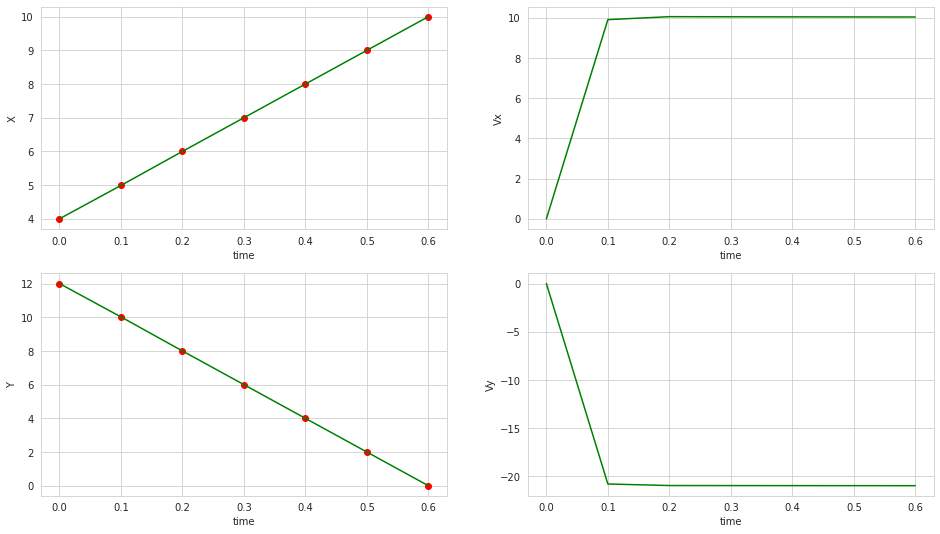

In [284]:
xs = np.append(initial_xy[0], np.array(x_plot)[:,0,:])
ys = np.append(initial_xy[1], np.array(x_plot)[:,1,:])
Vxs = np.append([0.], np.array(x_plot)[:,2,:])
Vys = np.append([0.], np.array(x_plot)[:,3,:])
time = np.linspace(0, dt*(len(xs)-1), len(xs))

measurements_plot = np.append([initial_xy[0], initial_xy[1]], measurements).reshape(-1, 2)

fig, ax = plt.subplots(2, 2, figsize=(16, 9))

ax[0][0].plot(time, measurements_plot[:,0], "ro")
ax[0][0].plot(time, xs, 'g-')
ax[0][0].set_xlabel('time')
ax[0][0].set_ylabel('X')

ax[1][0].plot(time, measurements_plot[:,1], "ro")
ax[1][0].plot(time, ys, 'g-')
ax[1][0].set_xlabel('time')
ax[1][0].set_ylabel('Y')

ax[0][1].plot(time, Vxs, 'g-')
ax[0][1].set_xlabel('time')
ax[0][1].set_ylabel('Vx')

ax[1][1].plot(time, Vys, 'g-')
ax[1][1].set_xlabel('time')
ax[1][1].set_ylabel('Vy')

Visualize the components of the $ K $ matrix below

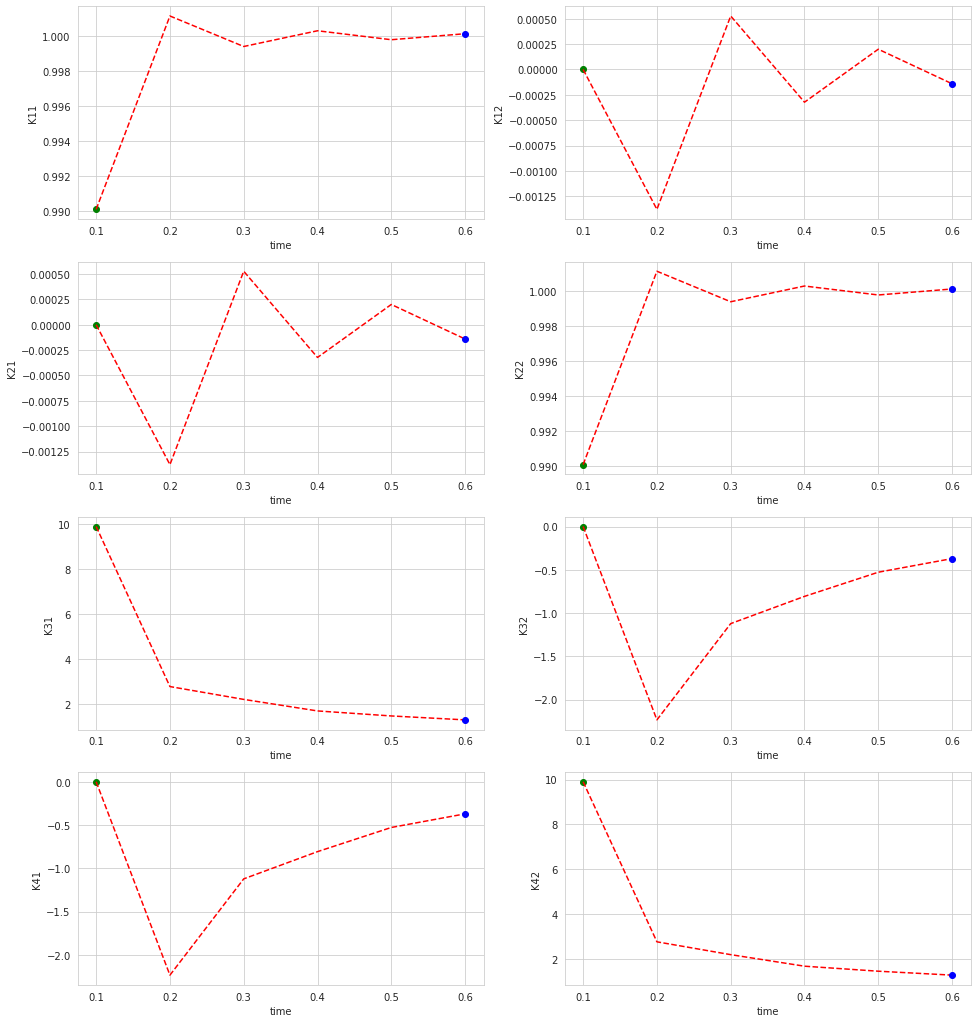

In [285]:
time = np.linspace(dt, dt*(len(xs)-1), len(xs)-1)

fig, ax = plt.subplots(4, 2, figsize=(16, 18))
ks = np.array(k)

for i in range(4):
    for j in range(2):
        ax[i][j].plot(time[0], ks[0,i,j], 'go')
        ax[i][j].plot(time, ks[:,i,j], 'r--')
        ax[i][j].plot(time[-1], ks[-1,i,j], 'bo')
        ax[i][j].set_xlabel('time')
        ax[i][j].set_ylabel(f'K{i+1}{j+1}')

In [286]:
print("### Second Experiment ###")
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])

### Second Experiment ###


In [287]:
k, x_plot = filter(x, E)

x= 
[[  0.95049505]
 [  4.04059406]
 [ 49.5049505 ]
 [-40.59405941]]
E= 
[[ 100.0990099   110.         1000.99009901 1100.        ]
 [ 110.          100.0990099  1100.         1000.99009901]
 [  10.99009901  110.          109.9009901  1100.        ]
 [ 110.           10.99009901 1100.          109.9009901 ]]
x= 
[[ 6.00022607e+00]
 [-2.30080609e-04]
 [ 4.99614369e+01]
 [-4.10408438e+01]]
E= 
[[ 484.08031334  444.37609981 2420.4015667  2221.88049903]
 [ 444.37609981  484.08031334 2221.88049903 2420.4015667 ]
 [ 664.67389206  466.15282439 3323.36946032 2330.76412194]
 [ 466.15282439  664.67389206 2330.76412194 3323.36946032]]
x= 
[[ 11.00000013]
 [ -4.00000064]
 [ 49.96461045]
 [-41.0353921 ]]
E= 
[[2432.82708894 2522.06168121 8109.42362979 8406.87227069]
 [2522.06168121 2432.82708894 8406.87227069 8109.42362979]
 [2261.75862694 2559.20726783 7539.19542312 8530.69089277]
 [2559.20726783 2261.75862694 8530.69089277 7539.19542312]]
x= 
[[ 15.99999995]
 [ -8.00000005]
 [ 49.96774745]
 [-41.

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

Text(0, 0.5, 'Vy')

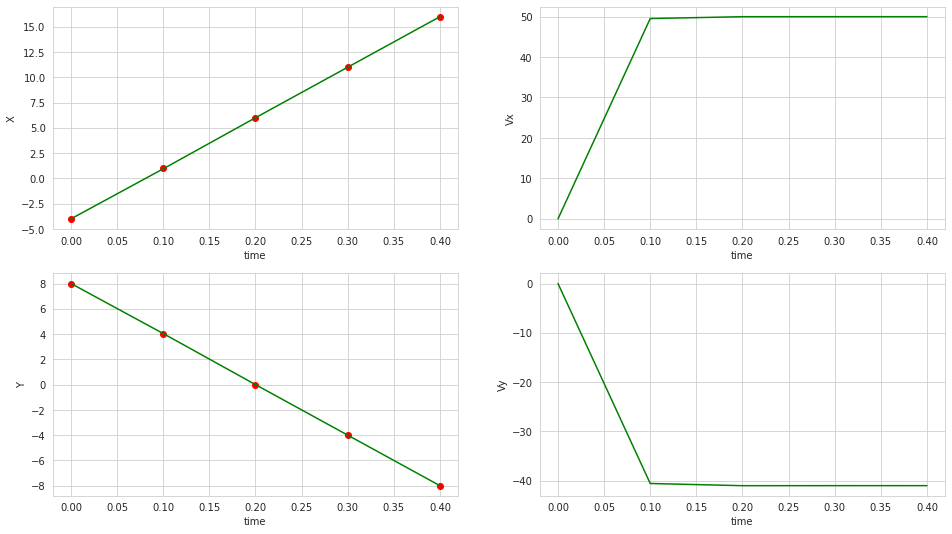

In [288]:
xs = np.append(initial_xy[0], np.array(x_plot)[:,0,:])
ys = np.append(initial_xy[1], np.array(x_plot)[:,1,:])
Vxs = np.append([0.], np.array(x_plot)[:,2,:])
Vys = np.append([0.], np.array(x_plot)[:,3,:])
time = np.linspace(0, dt*(len(xs)-1), len(xs))

measurements_plot = np.append([initial_xy[0], initial_xy[1]], measurements).reshape(-1, 2)

fig, ax = plt.subplots(2, 2, figsize=(16, 9))

ax[0][0].plot(time, measurements_plot[:,0], "ro")
ax[0][0].plot(time, xs, 'g-')
ax[0][0].set_xlabel('time')
ax[0][0].set_ylabel('X')

ax[1][0].plot(time, measurements_plot[:,1], "ro")
ax[1][0].plot(time, ys, 'g-')
ax[1][0].set_xlabel('time')
ax[1][0].set_ylabel('Y')

ax[0][1].plot(time, Vxs, 'g-')
ax[0][1].set_xlabel('time')
ax[0][1].set_ylabel('Vx')

ax[1][1].plot(time, Vys, 'g-')
ax[1][1].set_xlabel('time')
ax[1][1].set_ylabel('Vy')

Visualize the components of the $ K $ matrix below

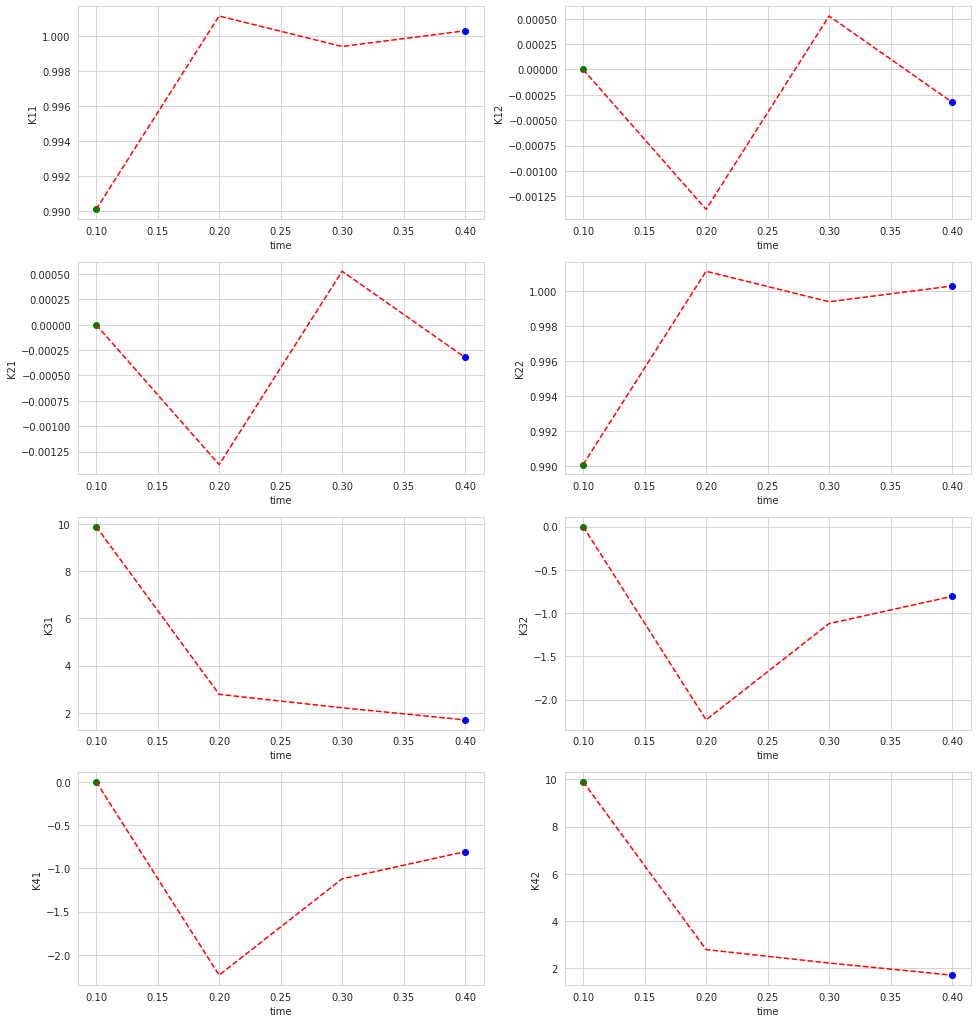

In [289]:
time = np.linspace(dt, dt*(len(xs)-1), len(xs)-1)

fig, ax = plt.subplots(4, 2, figsize=(16, 18))
ks = np.array(k)

for i in range(4):
    for j in range(2):
        ax[i][j].plot(time[0], ks[0,i,j], 'go')
        ax[i][j].plot(time, ks[:,i,j], 'r--')
        ax[i][j].plot(time[-1], ks[-1,i,j], 'bo')
        ax[i][j].set_xlabel('time')
        ax[i][j].set_ylabel(f'K{i+1}{j+1}')

In [290]:
print("### Third Experiment ###")
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

x = np.matrix(
    [[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]]
)  # initial robot state (location and velocity)
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])  # external motion applied to the robot

### Third Experiment ###


In [291]:
k, x_plot = filter(x, E)

x= 
[[  1.        ]
 [ 17.02079208]
 [  0.        ]
 [-20.79207921]]
E= 
[[ 100.0990099   110.         1000.99009901 1100.        ]
 [ 110.          100.0990099  1100.         1000.99009901]
 [  10.99009901  110.          109.9009901  1100.        ]
 [ 110.           10.99009901 1100.          109.9009901 ]]
x= 
[[  1.00005731]
 [ 14.99995204]
 [  0.09290451]
 [-20.90762182]]
E= 
[[ 484.08031334  444.37609981 2420.4015667  2221.88049903]
 [ 444.37609981  484.08031334 2221.88049903 2420.4015667 ]
 [ 664.67389206  466.15282439 3323.36946032 2330.76412194]
 [ 466.15282439  664.67389206 2330.76412194 3323.36946032]]
x= 
[[  1.00000068]
 [ 13.0000005 ]
 [  0.08257889]
 [-20.9174217 ]]
E= 
[[2432.82708894 2522.06168121 8109.42362979 8406.87227069]
 [2522.06168121 2432.82708894 8406.87227069 8109.42362979]
 [2261.75862694 2559.20726783 7539.19542312 8530.69089277]
 [2559.20726783 2261.75862694 8530.69089277 7539.19542312]]
x= 
[[  1.00000011]
 [ 11.00000011]
 [  0.07525594]
 [-20.92474406]]
E

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

Text(0, 0.5, 'Vy')

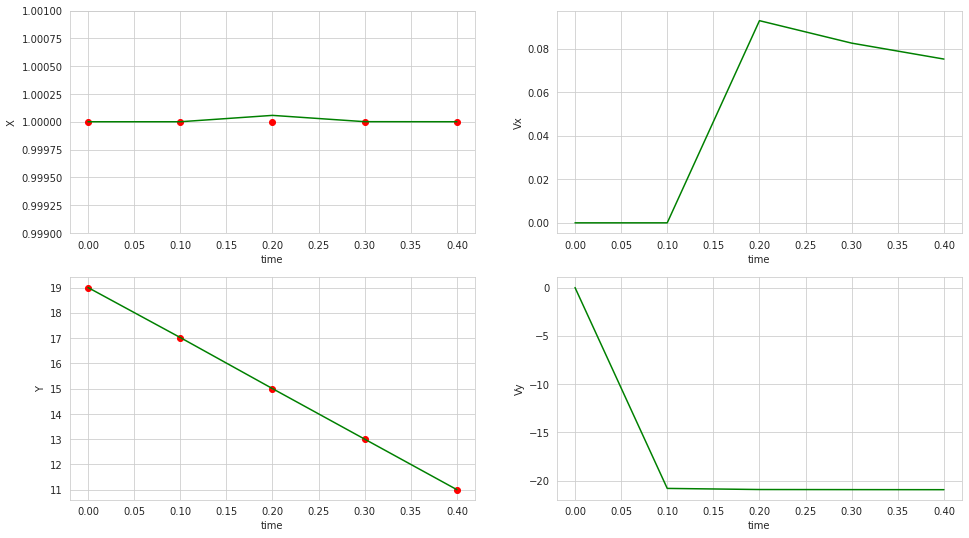

In [292]:
xs = np.append(initial_xy[0], np.array(x_plot)[:,0,:])
ys = np.append(initial_xy[1], np.array(x_plot)[:,1,:])
Vxs = np.append([0.], np.array(x_plot)[:,2,:])
Vys = np.append([0.], np.array(x_plot)[:,3,:])
time = np.linspace(0, dt*(len(xs)-1), len(xs))

measurements_plot = np.append([initial_xy[0], initial_xy[1]], measurements).reshape(-1, 2)

fig, ax = plt.subplots(2, 2, figsize=(16, 9))

ax[0][0].plot(time, measurements_plot[:,0], "ro")
ax[0][0].plot(time, xs, 'g-')
ax[0][0].set_xlabel('time')
ax[0][0].set_ylabel('X')
ax[0][0].set_ylim((0.999, 1.001))

ax[1][0].plot(time, measurements_plot[:,1], "ro")
ax[1][0].plot(time, ys, 'g-')
ax[1][0].set_xlabel('time')
ax[1][0].set_ylabel('Y')

ax[0][1].plot(time, Vxs, 'g-')
ax[0][1].set_xlabel('time')
ax[0][1].set_ylabel('Vx')

ax[1][1].plot(time, Vys, 'g-')
ax[1][1].set_xlabel('time')
ax[1][1].set_ylabel('Vy')

Visualize the components of the $ K $ matrix below

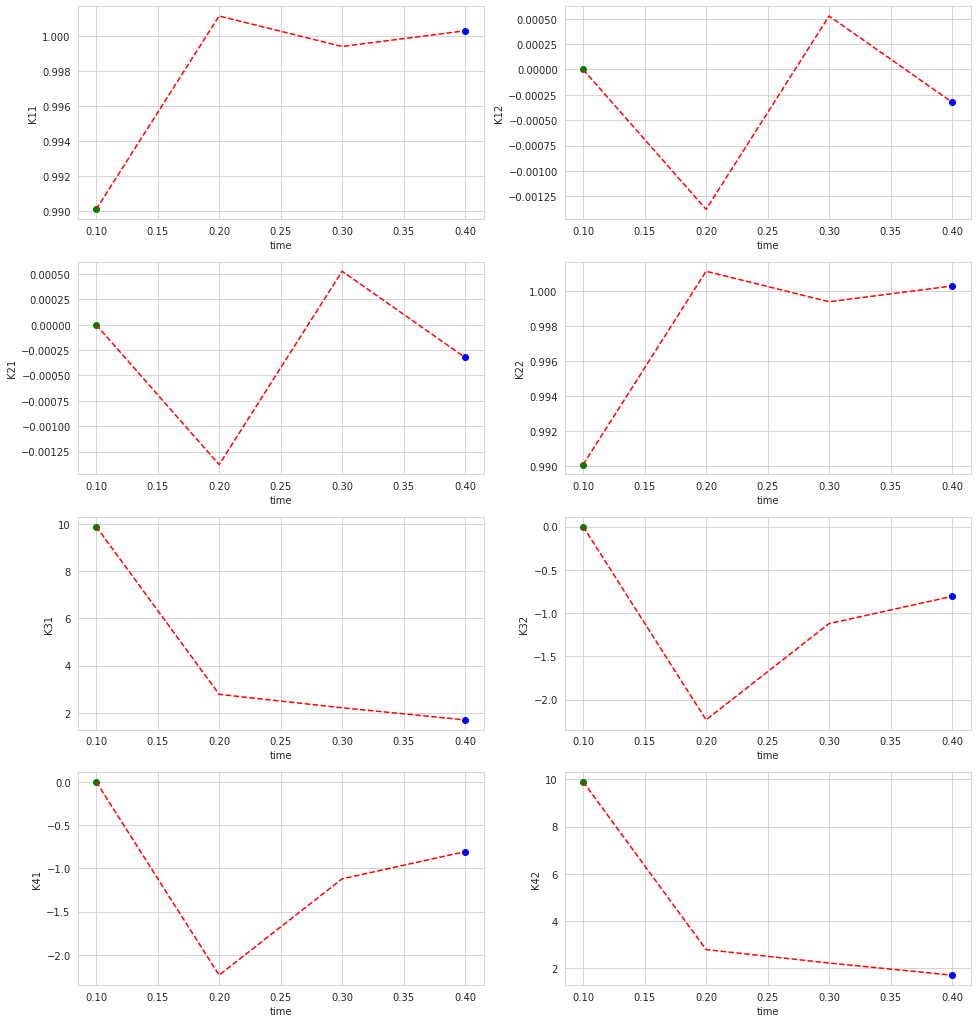

In [293]:
time = np.linspace(dt, dt*(len(xs)-1), len(xs)-1)

fig, ax = plt.subplots(4, 2, figsize=(16, 18))
ks = np.array(k)

for i in range(4):
    for j in range(2):
        ax[i][j].plot(time[0], ks[0,i,j], 'go')
        ax[i][j].plot(time, ks[:,i,j], 'r--')
        ax[i][j].plot(time[-1], ks[-1,i,j], 'bo')
        ax[i][j].set_xlabel('time')
        ax[i][j].set_ylabel(f'K{i+1}{j+1}')

Судя по всему коэффициенты матрицы К в фильтре Калмана говорят о постепенной минимизации ошибки предсказания. То-есть это коэффициенты, которыми фильтр корректирует показания системы относительно нашего ожидания. Чем меньше компонента, тем лучше.

Судя по графикам, мы довольно быстро точно определяем скорость относительно каждой координаты. Только в 3 примере есть какой то выброс незначительный.